### 앙상블 학습 (Ensemble Learning)
- 어떤 데이터의 값을 예측한다고 할 때, 하나의 모델만 가지고 결과를 도출할 수도 있지만,  
  여러 개의 모델을 조화롭게 학습시켜 그 모델들의 예측 결과들을 이용한다면, 더 정확한 예측값을 구할 수 있다.
- 여러 개의 분류기를 생성하고 그 예측을 결합하여 1개의 분류기를 사용할 때보다 더 정확하고 신뢰성 높은 예측을 도출하는 기법이다.
- 강력한 하나의 모델을 사용하는 것보다 약한 모델을 여러 개 조합하여 더 정확한 예측에 도움을 주는 방식이다.
- 앙상블 학습의 주요 방법은 배깅(Bagging)과 부스팅(Boosting)이다.

#### 보팅(Voting)
- "하나의 데이터 세트"에 대해 서로 다른 알고리즘을 가진 분류기를 결합하는 방식이다.
- 서로 다른 분류기들에 "동일한 데이터 세트"를 병렬로 학습해서 예측값을 도출하고, 이를 합산하여 최종 예측값을 산출해내는 방식을 말한다.  

  
> 1. 하드 보팅 (Hard Voting)
> - 각 분류기가 만든 예측값을 다수결로 투표해서 가장 많은 표를 얻은 예측값을 최종 예측값으로 결정하는 보팅 방식을 말한다.
>
> <img src="./images/hard_voting.png" width="420px">


> 2. 소프트 보팅 (Soft Voting)
> - 각 분류기가 예측한 타겟별 확률을 평균내어 가장 높은 확률의 타겟을 최종 예측값으로 도출한다.
> 
> <img src="./images/soft_voting.png" width="440px">

#### 배깅 (Bagging, Bootstrap Aggregation)
- 하나의 데이터 세트에서 "여러 번 중복을 허용하면서 학습 데이터 세트를 랜덤하게 뽑은 뒤(Bootstrap)" 하나의 예측기 여러 개를 병렬로 학습시켜서 결과물을 집계(Aggregation)하는 방법이다.
- Voting 방식과 달리 같은 알고리즘의 분류기를 사용하고 훈련 세트를 무작위로 구성하여 각기 다르게(독립적으로, 병렬로) 학습시킨다.
- 학습 데이터가 충분하지 않더라도 충분한 학습효과를 주어 과적합등의 문제를 해결하는 데 도움을 준다.
- 배깅방식을 사용한 대표적인 알고리즘이 바로 랜덤 포레스트 알고리즘이다.  

<img src="./images/voting_bagging.png" width="600px">

#### 부스팅(Boosting)
- 이전 분류기의 학습 결과를 토대로 다음 분류기의 학습 데이터의 샘플 가중치를 조정해서 "순차적으로" 학습을 진행하는 방법이다.
- 이전 분류기를 계속 개선해 나가는 방향으로 학습이 진행되고, 오답에 대한 높은 가중치를 부여하므로 정확도가 높게 나타난다.
- 높은 가중치를 부여하기 때문에 이상치(Outlier)에 취약할 수 있다.

<img src="./images/boosting01.png" width="600px" style="margin-top: 20px">

> 1. Adaboost(Adaptive boosting)
> 2. GBM(Gradient Boost Machine)
> 3. XGBoost(eXtra Gradient Boost)
> 4. LightGBM(Light Gradient Boosting Machine)

#### 보팅 (Voting)
**VotingClassifier(n_estimators, voting)**
- n_estimators: 추가할 모델 객체를 list형태로 전달한다. 각 모델은 튜플 형태인 ('key', model)로 작성한다.
- voting: 'soft', 'hard' 둘 중 선택한다(default: 'hard')

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

c_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
c_df['target'] = cancer.target

c_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
c_df.isna().sum().sum()

0

In [9]:
corr = c_df.corr()
corr[['target']].sort_values(by='target', ascending=False)[1:]

,target
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499
mean smoothness,-0.358560


Text(0.5, 1.0, 'Correlation')

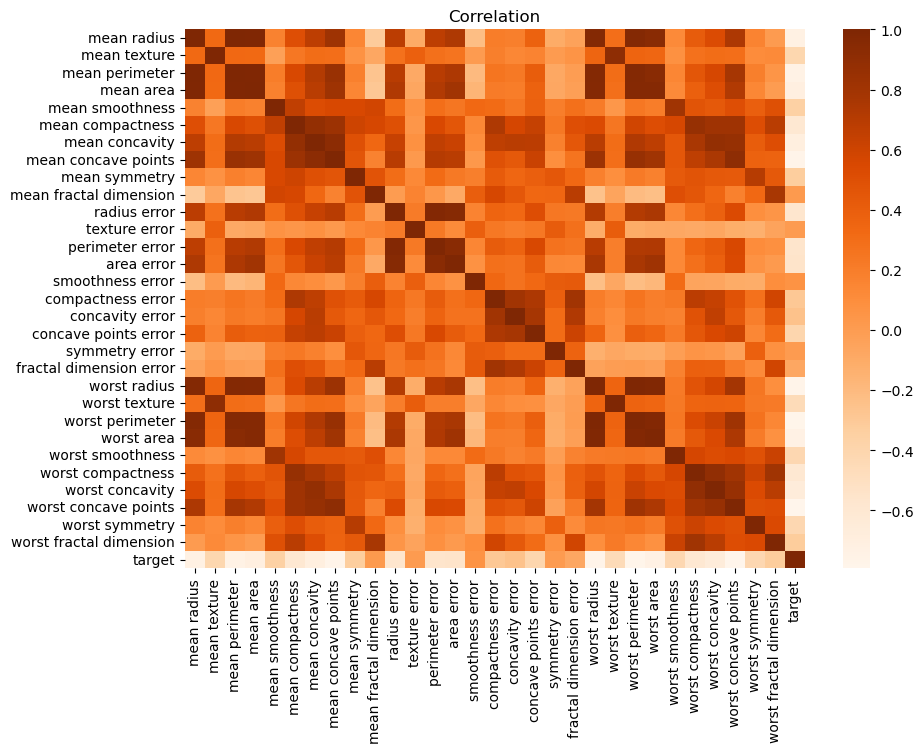

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(corr, cmap='Oranges')
heatmap.set_title('Correlation')

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

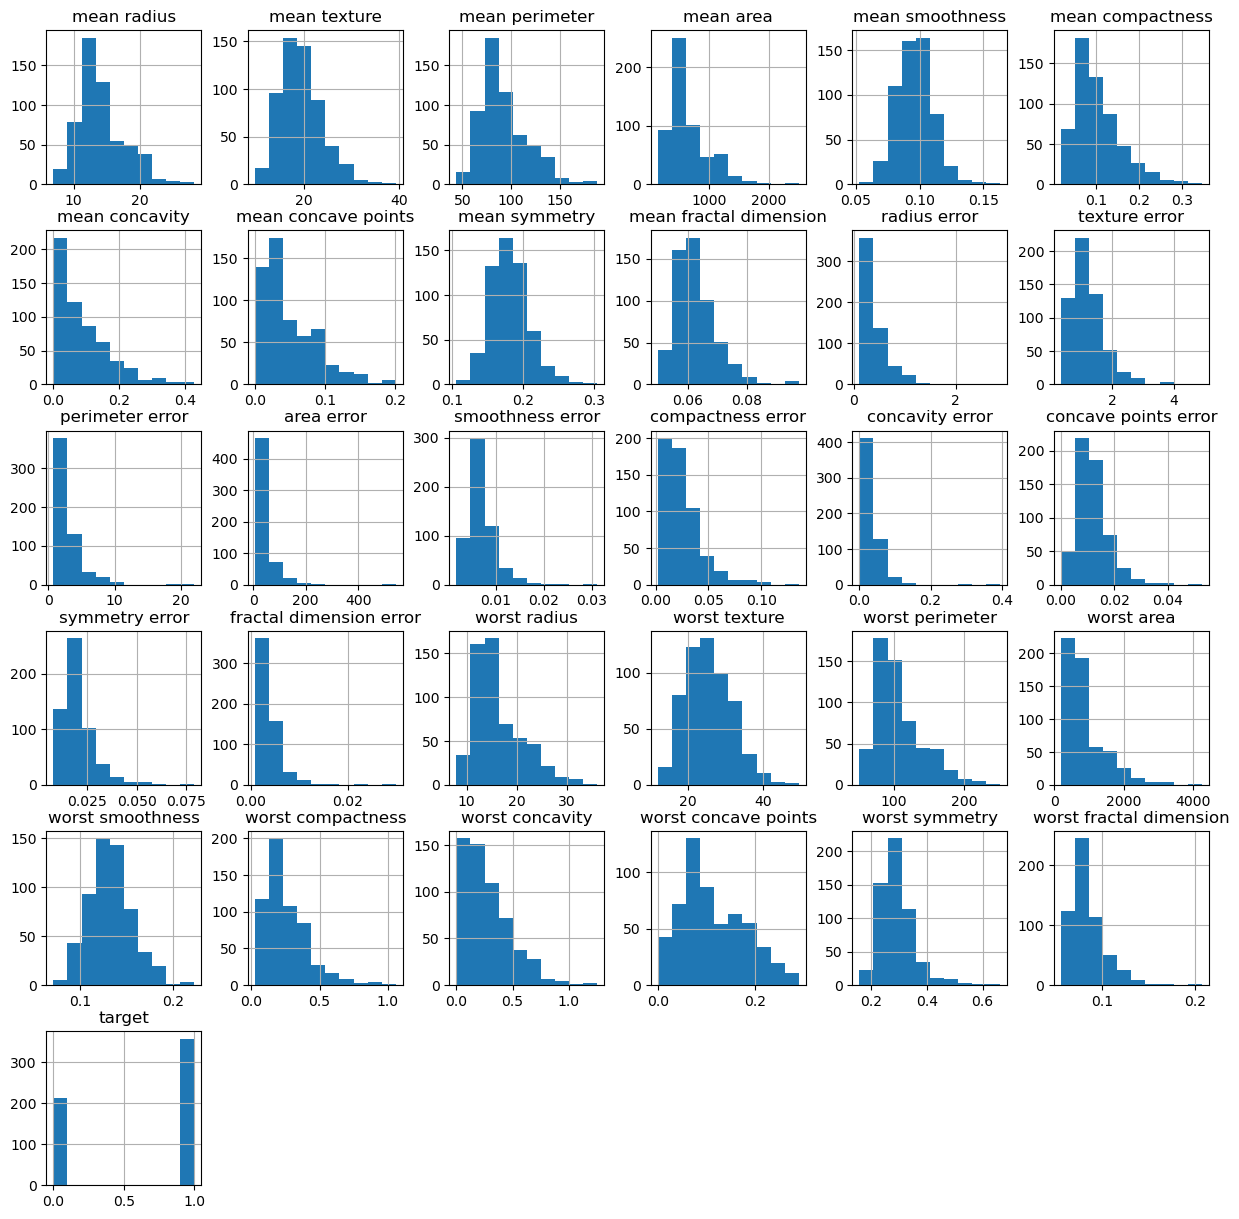

In [12]:
c_df.hist(figsize=(15, 15))

In [15]:
c_df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

target
0    285
1    285
Name: count, dtype: int64

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



dtc_parameters = {'max_depth': [10, 11, 12], 'min_samples_split': [20, 21, 22]}
svc_parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__kernel': ['linear', 'rbf']}
knn_parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True)

knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True)

In [28]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_split': [20, 21, 22]},
             return_train_score=True)

In [31]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [42]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [30]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 20}",0.933333,3
1,"{'max_depth': 10, 'min_samples_split': 21}",0.933333,2
2,"{'max_depth': 10, 'min_samples_split': 22}",0.929825,9
3,"{'max_depth': 11, 'min_samples_split': 20}",0.933333,3
4,"{'max_depth': 11, 'min_samples_split': 21}",0.931579,7
5,"{'max_depth': 11, 'min_samples_split': 22}",0.933333,3
6,"{'max_depth': 12, 'min_samples_split': 20}",0.935088,1
7,"{'max_depth': 12, 'min_samples_split': 21}",0.933333,3
8,"{'max_depth': 12, 'min_samples_split': 22}",0.931579,7


In [60]:
from sklearn.preprocessing import StandardScaler

svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(svc_result_df['params'][0])
display(svc_result_df)

svc = SVC(C=0.001, kernel='linear', probability=True)
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

svc_pipe.fit(X_train_over, y_train_over)

{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}


,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.942105,40
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.761404,56
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.942105,40
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.919298,47
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.942105,40
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",0.801754,53
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.970175,24
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.596491,61
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",0.970175,24


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=0.001, kernel='linear', probability=True))])

In [48]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(knn_result_df['params'].iloc[3])
display(knn_result_df)

knn = KNeighborsClassifier(n_neighbors=9)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

knn_pipe.fit(X_train_over, y_train_over)

{'knn__n_neighbors': 9}


,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.977193,1
1,{'knn__n_neighbors': 5},0.963158,2
2,{'knn__n_neighbors': 7},0.963158,2
3,{'knn__n_neighbors': 9},0.961404,5
4,{'knn__n_neighbors': 11},0.963158,2


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [61]:
from sklearn.ensemble import VotingClassifier

# [[39  3]
#  [ 6 66]]
# 정확도: 0.9211, 정밀도: 0.9565, 재현율: 0.9167, F1: 0.9362, ROC-AUC: 0.9226
# vc = VotingClassifier(estimators=[('dtc', dtc), 
#                              ('svc', svc_pipe), 
#                              ('knn', knn_pipe)], 
#                  voting='hard', 
#                  n_jobs=-1)

# 오차 행렬
# [[41  1]
#  [ 7 65]]
# 정확도: 0.9298, 정밀도: 0.9848, 재현율: 0.9028, F1: 0.9420, ROC-AUC: 0.9395
vc = VotingClassifier(estimators=[('dtc', dtc), 
                             ('svc', svc_pipe), 
                             ('knn', knn_pipe)], 
                 voting='soft', 
                 n_jobs=-1)

In [62]:
vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=12,
                                                     min_samples_split=20)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=0.001, kernel='linear',
                                                   probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=9))]))],
                 n_jobs=-1, voting='soft')

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [64]:
prediction = vc.predict(X_test)

오차 행렬
[[41  1]
 [ 7 65]]
정확도: 0.9298, 정밀도: 0.9848, 재현율: 0.9028, F1: 0.9420, ROC-AUC: 0.9395
################################################################################


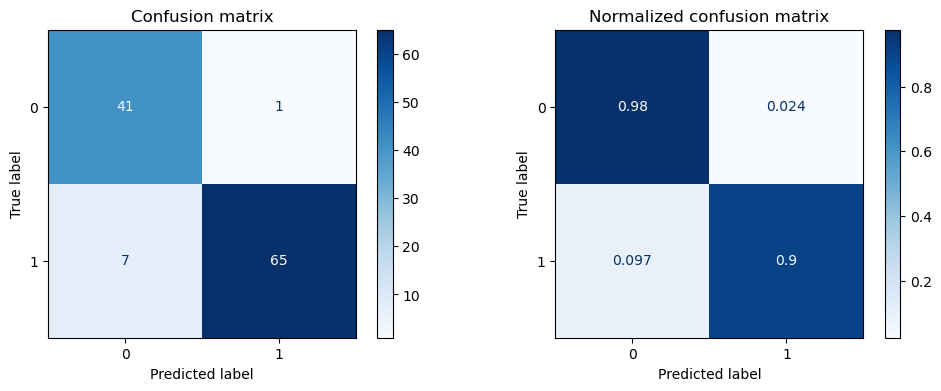

In [65]:
get_evaluation(y_test, prediction, vc, X_test)

#### 배깅(Bagging) - 랜덤 포레스트(Random Forest)
**RandomForestClassifier(n_estimators, min_samples_split, min_samples_leaf, n_jobs)**

- n_estimators: 생성할 tree(모델)의 개수를 작성한다(default: 50)

In [66]:
import pandas as pd

c_df = pd.read_csv('./datasets/car.csv')
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1728 non-null   object
 1   Main_cost  1728 non-null   object
 2   Doors      1728 non-null   object
 3   Persons    1728 non-null   object
 4   Lug_cap    1728 non-null   object
 5   Safety     1728 non-null   object
 6   Decision   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [67]:
c_df

,Price,Main_cost,Doors,Persons,Lug_cap,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [69]:
pre_c_df = c_df.copy()

In [71]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for column in c_df.columns:
    encoder = LabelEncoder()
    pre_c_df[column] = encoder.fit_transform(c_df[column].tolist())
    encoders[column] = encoder
    print(f'{column}: {encoder.classes_}')

Price: ['high' 'low' 'med' 'vhigh']
Main_cost: ['high' 'low' 'med' 'vhigh']
Doors: ['2' '3' '4' '5more']
Persons: ['2' '4' 'more']
Lug_cap: ['big' 'med' 'small']
Safety: ['high' 'low' 'med']
Decision: ['acc' 'good' 'unacc' 'vgood']


In [73]:
c_df.Price.value_counts()

Price
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

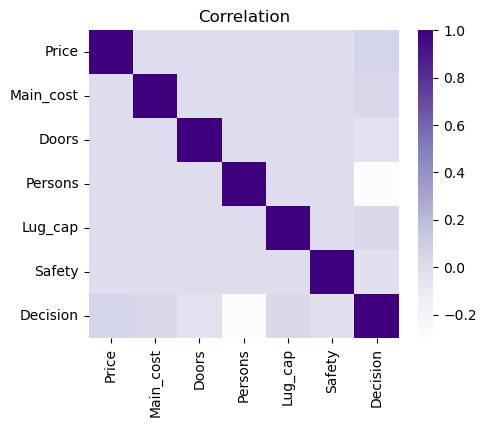

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 4))
corr = pre_c_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Main_cost'}>,
        <Axes: title={'center': 'Doors'}>],
       [<Axes: title={'center': 'Persons'}>,
        <Axes: title={'center': 'Lug_cap'}>,
        <Axes: title={'center': 'Safety'}>],
       [<Axes: title={'center': 'Decision'}>, <Axes: >, <Axes: >]],
      dtype=object)

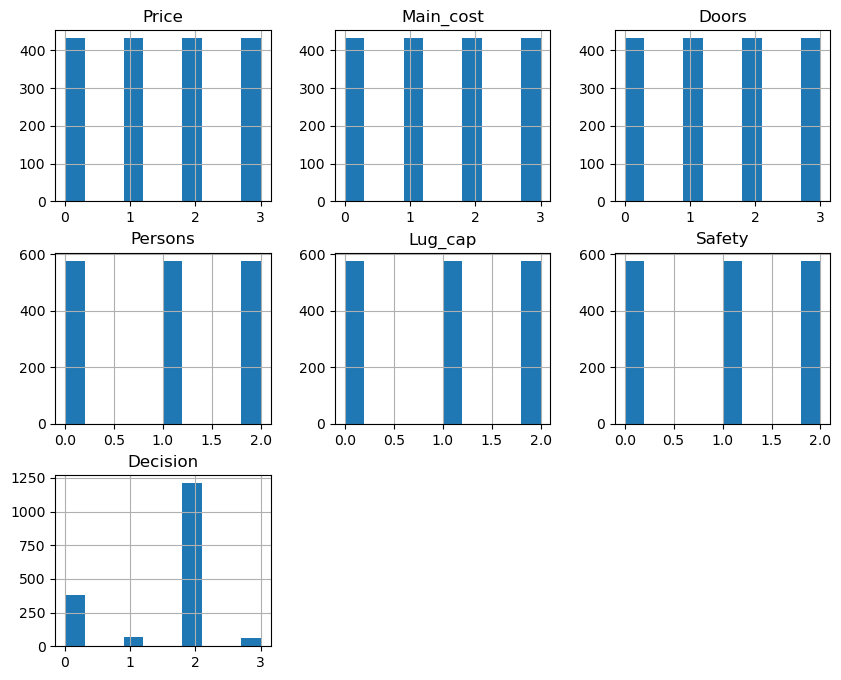

In [77]:
pre_c_df.hist(figsize=(10, 8))

In [88]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'max_depth': [1, 2, 3],
    'min_samples_split': [6, 12, 18, 24]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = pre_c_df.iloc[:, 1:], pre_c_df.Price

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_split': [6, 12, 18, 24]})

In [89]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 6}",0.221395,12
1,"{'max_depth': 1, 'min_samples_split': 12}",0.237342,11
2,"{'max_depth': 1, 'min_samples_split': 18}",0.238051,10
3,"{'max_depth': 1, 'min_samples_split': 24}",0.246028,9
4,"{'max_depth': 2, 'min_samples_split': 6}",0.265530,1
5,"{'max_depth': 2, 'min_samples_split': 12}",0.253232,8
6,"{'max_depth': 2, 'min_samples_split': 18}",0.261240,4
7,"{'max_depth': 2, 'min_samples_split': 24}",0.261902,3
8,"{'max_depth': 3, 'min_samples_split': 6}",0.259816,5
9,"{'max_depth': 3, 'min_samples_split': 12}",0.257590,7


In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [93]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

오차 행렬
[[14  7 24 42]
 [17 10 36 23]
 [15 10 25 37]
 [29 11 17 29]]
정확도: 0.2254, 정밀도: 0.2291, 재현율: 0.2254, F1: 0.2165
################################################################################


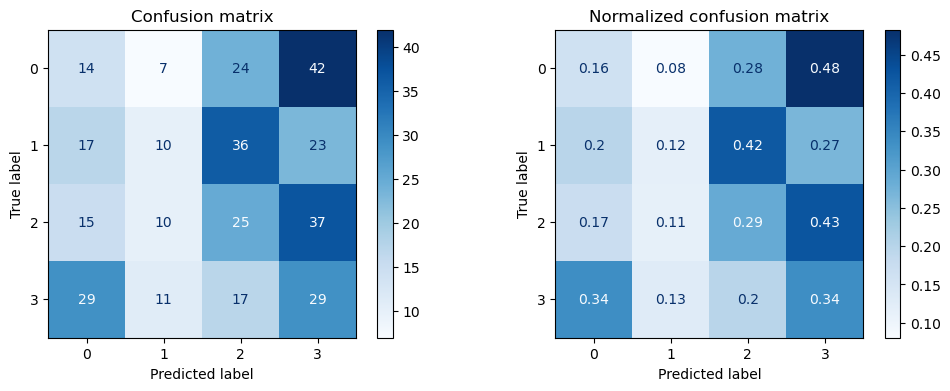

In [94]:
get_evaluation(y_test, prediction, rfc, X_test)

In [95]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(rfc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([5, 0, 1, 3, 2, 4], dtype=int64)

In [96]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

Decision: 0.0472
Main_cost: -0.0127
Doors: -0.0161
Lug_cap: -0.0172
Persons: -0.0295
Safety: -0.0347


#### 1 Cycle 결과
Decision feature에 중요도가 그나마 높게 나왔지만,  
그 수치가 너무 작기 때문에 전체적으로 비율을 맞춰주는 MinMaxScaler()로 스케일링 하기로 한다.

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'rfc__max_depth': [1, 2, 3],
    'rfc__min_samples_split': [6, 12, 18, 24]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = pre_c_df.iloc[:, 1:], pre_c_df.Price

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

rfc_pipe = Pipeline([('min_max_scaler', MinMaxScaler()), ('rfc', rfc)])

g_rfc = GridSearchCV(rfc_pipe, param_grid=parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [1, 2, 3],
                         'rfc__min_samples_split': [6, 12, 18, 24]})

In [100]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.237327,10
1,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.215624,12
2,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.232265,11
3,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.239532,9
4,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.272068,1
5,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.264076,5
6,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.267746,3
7,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.269888,2
8,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.259764,6
9,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.252549,7


In [107]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

오차 행렬
[[13  0 25 49]
 [16  7 36 27]
 [21  3 25 38]
 [34  0 17 35]]
정확도: 0.2312, 정밀도: 0.3331, 재현율: 0.2313, F1: 0.2147
################################################################################


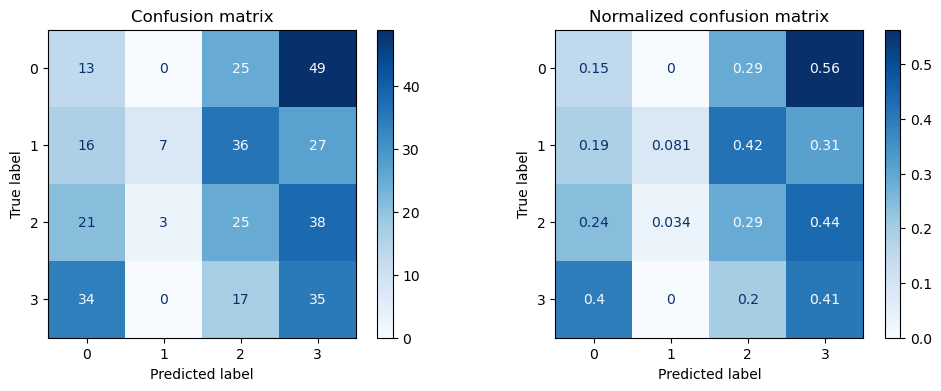

In [108]:
get_evaluation(y_test, prediction, rfc, X_test)

#### Last Cycle 결과
전체 데이터에 MinMaxScaler()로 스케일링 하였지만, 소폭 성능이 상승하였다.  
패턴을 분석할 수 있는 데이터가 더 수집되어야 할 것으로 보인다.